# FIFA 21 PROJECT (I)

In [319]:
import pandas as pd
import numpy as nm
pd.set_option('display.max_rows', None)
data=pd.read_csv('fifa21_train.csv')
pd.set_option('display.max_columns', None)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [257]:
#checking for the dimensions
data.head()
data.shape

(11701, 101)

In [214]:
# Change headers names to lowercase
cols = []
for column in data.columns:
    cols.append(column.lower())
cols
data.columns = cols
data.head(20)

,id,name,age,nationality,club,bp,position,team & contract,height,weight,foot,growth,joined,loan date end,value,wage,release clause,contract,attacking,crossing,finishing,heading accuracy,short passing,volleys,skill,dribbling,curve,fk accuracy,long passing,ball control,movement,acceleration,sprint speed,agility,reactions,balance,power,shot power,jumping,stamina,strength,long shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing tackle,sliding tackle,goalkeeping,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,total stats,base stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
5,182411,Yu Hanchao,33,China PR,Shanghai Greenland Shenhua FC,LM,LM LW RW,Shanghai Greenland Shenhua FC 2020 ~ 2023,"5'10""",154lbs,Right,0,"Jul 18, 2020",NaN,€1.4M,€11K,€2.2M,2020 ~ 2023,328,69,64,64,72,59.0,333,71,62.0,64,64,72,358,73,74,75.0,69,67.0,321,65,63.0,70,64,59,300,56,38.0,68.0,74.0,64,71.0,103,31,34,38.0,65,16,10,15,8,16,1808,379,4 ★,3★,High,Low,1 ★,74,63,70,71,37,64,6,67+2,67+2,67+2,70+0,69+0,69+0,69+0,70+0,70+1,70+1,70+1,70+1,66+2,66+2,66+2,70+1,58+2,55+2,55+2,55+2,58+2,55+2,49+2,49+2,49+2,55+2,19+2,71
6,184392,M. Darmian,30,Italy,Parma,RB,RB LB,Parma 2019 ~ 2023,"6'0""",154lbs,Right,0,"Sep 2, 2019",NaN,€6M,€28K,€10.8M,2019 ~ 2023,325,69,55,68,74,59.0,316,72,69.0,35,66,74,361,68,67,77.0,74,75.0,329,69,67.0,75,62,56,318,74

In [215]:
#Finding the null values
data.isna().sum()

id                      0
name                    0
age                     0
nationality             0
club                   18
bp                      0
position              288
team & contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 41
loan date end       11072
value                   0
wage                    0
release clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading accuracy        0
short passing           0
volleys                41
skill                   0
dribbling               0
curve                  41
fk accuracy             0
long passing            0
ball control            0
movement                0
acceleration            0
sprint speed            0
agility                41
reactions               0
balance                41
power                   0
shot power              0
jumping     

In [216]:
#Deleting useless columns
data=data.drop(['position','club','joined','loan date end','a/w','d/w','id','age','nationality','team & contract','height','weight','foot','growth','value','wage','release clause','contract','attacking','skill','movement','power','mentality','defending','goalkeeping','total stats',
       'base stats', 'w/f', 'sm', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk','ls','hits'],axis=1)


In [217]:
#After Deleting useless columns
data.shape

(11701, 44)

In [222]:
data.isna().sum()

name                  0
bp                    0
crossing              0
finishing             0
heading accuracy      0
short passing         0
volleys              41
dribbling             0
curve                41
fk accuracy           0
long passing          0
ball control          0
acceleration          0
sprint speed          0
agility              41
reactions             0
balance              41
shot power            0
jumping              41
stamina               0
strength              0
long shots            0
aggression            0
interceptions         7
positioning           7
vision               41
penalties             0
composure           279
marking               0
standing tackle       0
sliding tackle       41
gk diving             0
gk handling           0
gk kicking            0
gk positioning        0
gk reflexes           0
ir                    0
pac                   0
sho                   0
pas                   0
dri                   0
def             

In [ ]:
#Deleting the null values in column 'curve', therby it deletes the null values in other rows as well
data= data[data['curve'].isna()==False]

In [ ]:
#Replacing the null value in 'composure' with its mean
mean_composure = data['composure'].mean()
mean_composure
data['composure'] = data['composure'].fillna(mean_composure)

In [ ]:
#Checking for duplicate values
data_duplicate=data[data.duplicated()] 
data_duplicate

In [285]:
data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [221]:
#This is for replacing the star with empty space
data['ir']=data['ir'].str.replace('★','') 

In [ ]:
#Converting string to numerical in 'ir'
data['ir'] = pd.to_numeric(data['ir'],errors='coerce')

In [286]:
#Categorising the columns as numerical
data_num=data._get_numeric_data()
data_num.head()

,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,184383,26,1,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,69,51,63,63,51,60,64
1,188044,30,0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,83,75,68,82,33,71,77
2,184431,33,0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,80,77,78,86,27,56,80
3,233796,22,13,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,57,44,54,57,57,60,59
4,234799,23,8,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,66,44,60,64,60,66,65


In [225]:
#Categorising the column as category
data_cat=data.select_dtypes('object')
data_cat.head()

In [287]:
#Describing the truncated data
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11701.0,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Age,11701.0,25.270490,4.957640,16.0,21.0,25.0,29.0,43.0
Growth,11701.0,5.534655,5.810903,-1.0,0.0,4.0,10.0,26.0
Attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
Crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
Finishing,11701.0,48.048116,19.399617,3.0,33.0,52.0,64.0,95.0
Heading Accuracy,11701.0,53.494060,16.956195,5.0,46.0,56.0,65.0,93.0
Short Passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
Volleys,11660.0,45.067324,17.732902,4.0,32.0,47.0,59.0,90.0
Skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0


<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


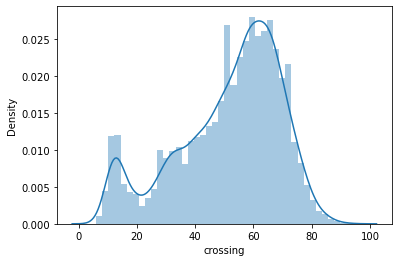

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


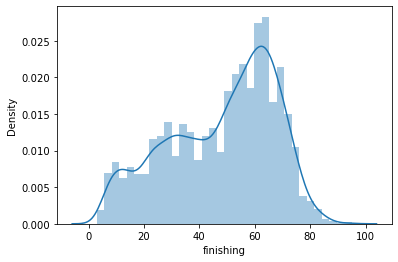

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


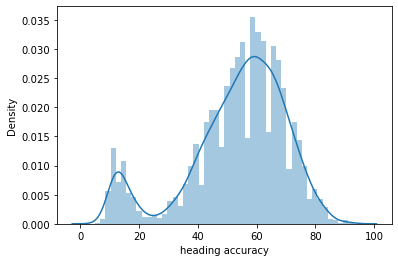

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


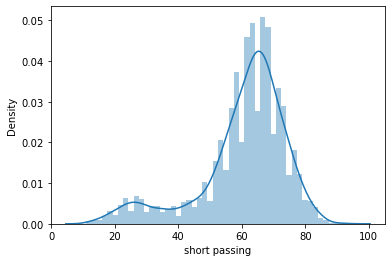

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


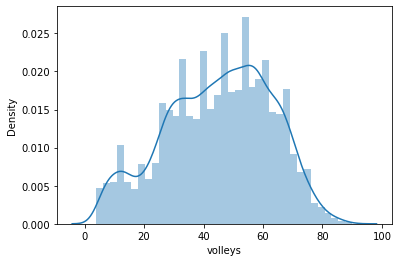

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


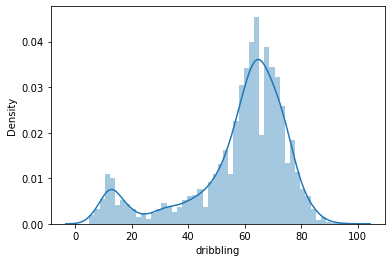

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


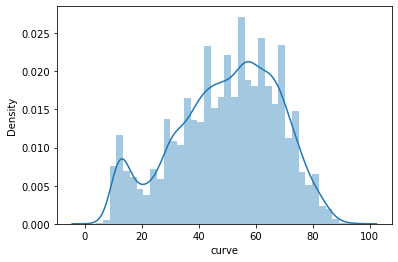

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


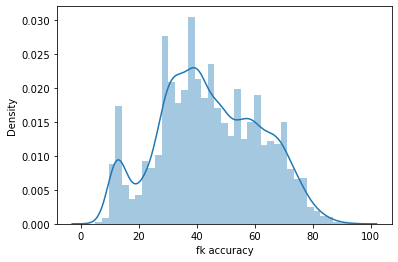

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


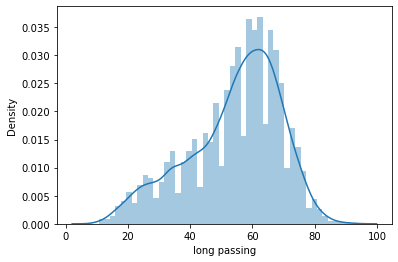

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


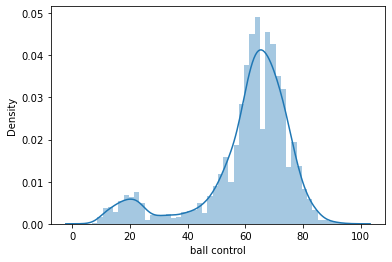

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


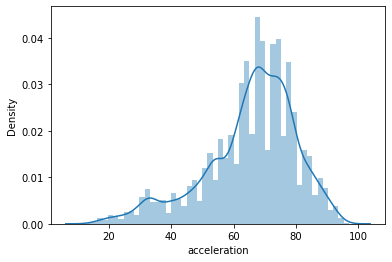

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


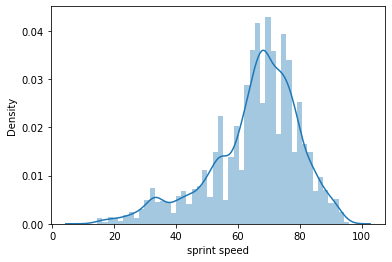

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


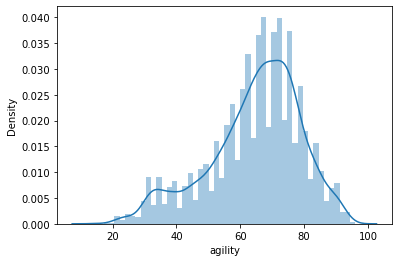

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


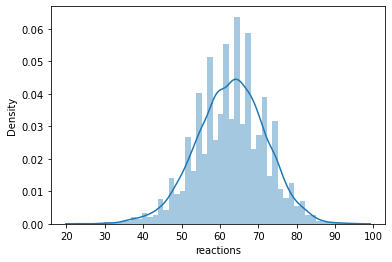

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


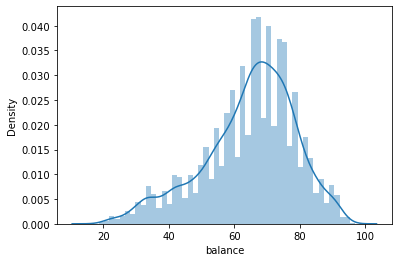

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


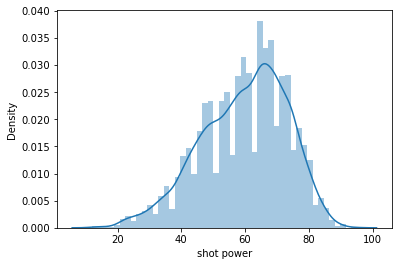

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


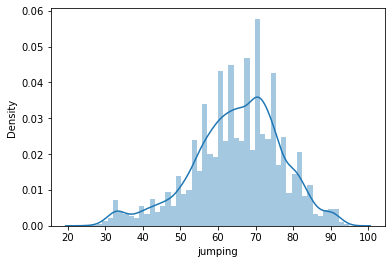

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


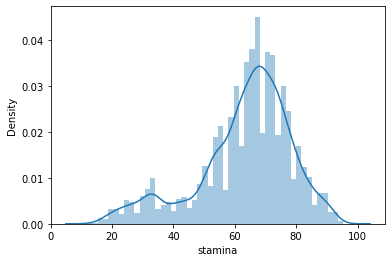

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


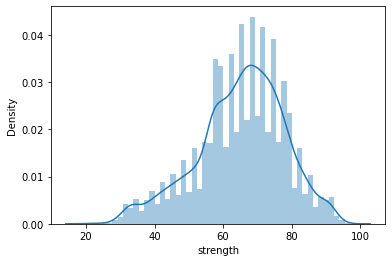

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


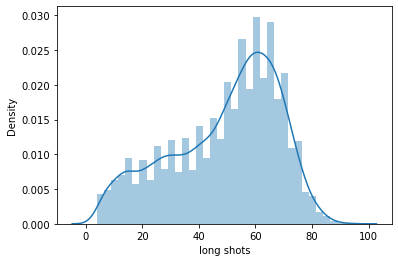

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


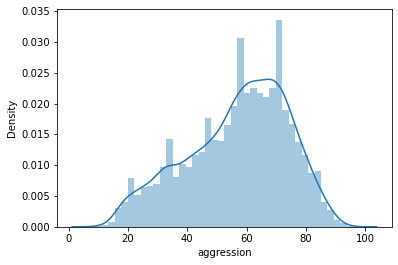

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


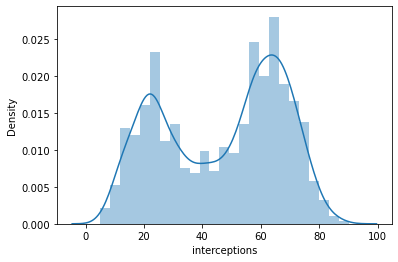

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


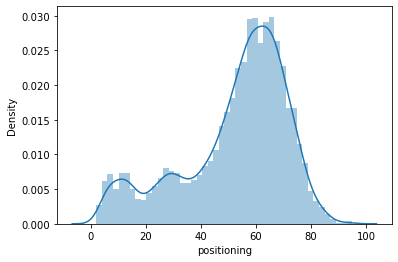

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


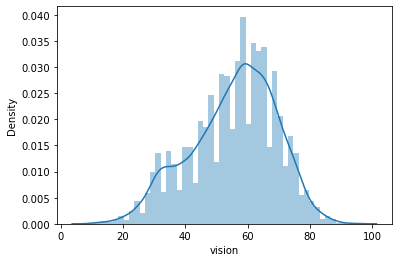

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


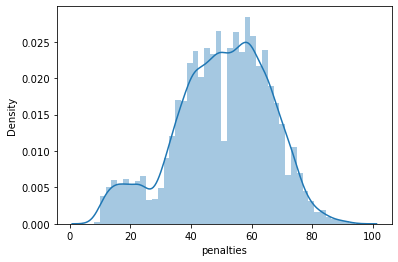

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


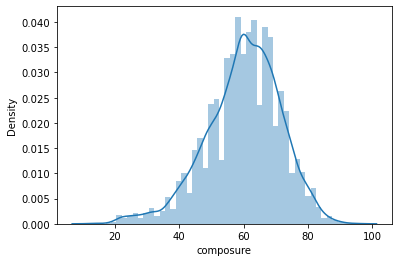

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


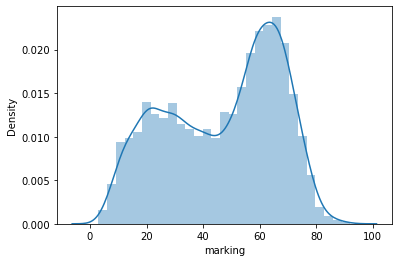

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


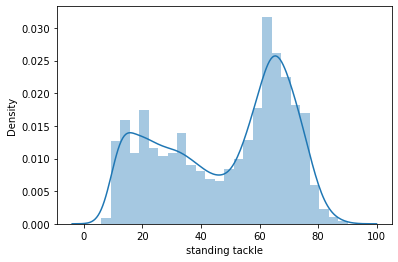

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


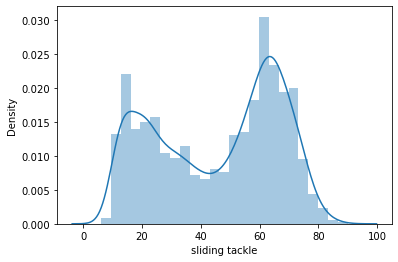

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


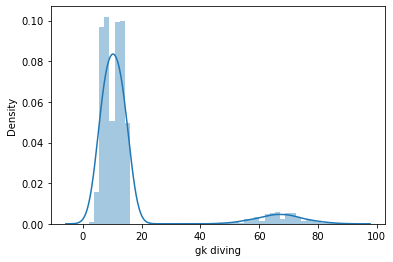

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


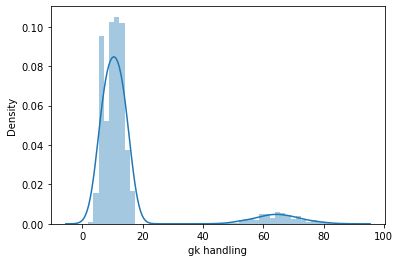

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


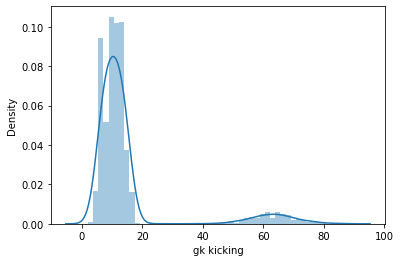

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


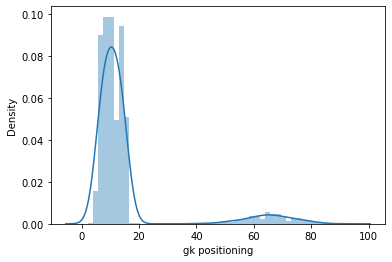

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


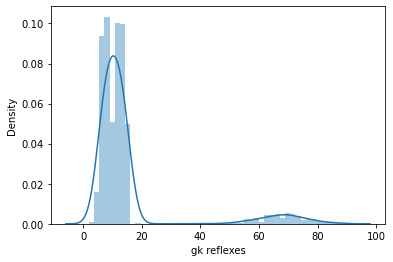

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


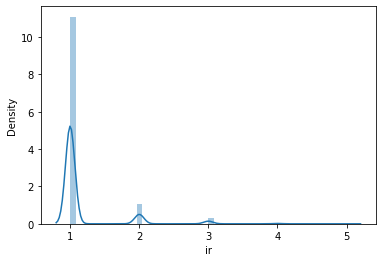

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


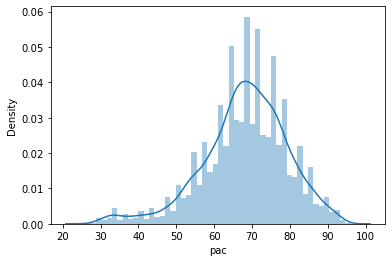

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


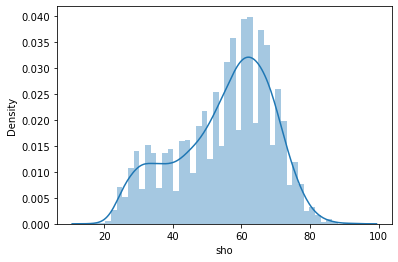

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


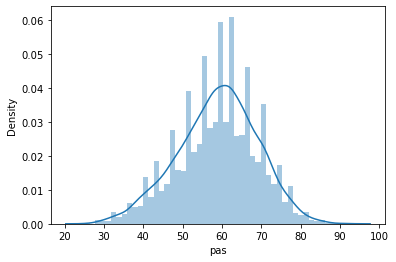

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


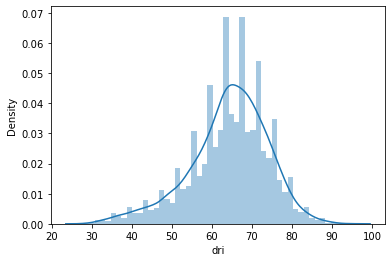

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


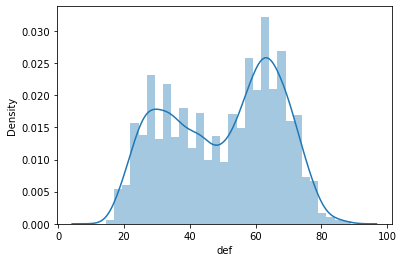

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


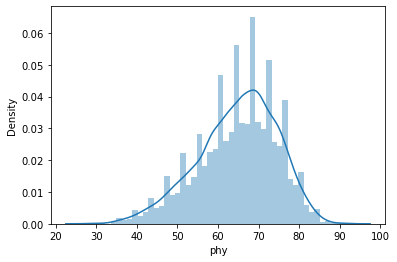

<ipython-input-245-a762b9b354bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat_num[column])


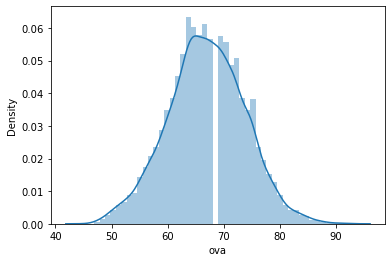

In [245]:
#Visualizing the various plots for the numerical data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in dat_num.columns:
    sns.distplot(dat_num[column])
    plt.show()

In [248]:
#Looking for correlations
correlations = data_num.corr()
correlations

,crossing,finishing,heading accuracy,short passing,volleys,dribbling,curve,fk accuracy,long passing,ball control,acceleration,sprint speed,agility,reactions,balance,shot power,jumping,stamina,strength,long shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing tackle,sliding tackle,gk diving,gk handling,gk kicking,gk positioning,gk reflexes,ir,pac,sho,pas,dri,def,phy,ova
crossing,1.000000,0.646452,0.435504,0.799958,0.676382,0.854519,0.833572,0.752489,0.741111,0.834768,0.633761,0.601657,0.688321,0.372383,0.620870,0.532370,0.091377,0.635331,-0.056658,0.734085,0.457100,0.399759,0.779334,0.684193,0.629196,0.592161,0.417413,0.404551,0.384834,-0.647737,-0.646520,-0.643415,-0.646761,-0.650899,0.182547,0.302721,0.204065,0.503017,0.444678,0.225416,-0.001958,0.388970
finishing,0.646452,1.000000,0.455455,0.651742,0.891072,0.821363,0.762762,0.696597,0.487609,0.784957,0.568288,0.551397,0.626092,0.330137,0.510083,0.725650,0.064008,0.473554,0.002363,0.883703,0.241192,-0.070699,0.898420,0.695957,0.842278,0.562310,-0.032028,-0.072421,-0.114500,-0.579166,-0.577974,-0.573325,-0.575787,-0.577115,0.164307,0.279985,0.607034,0.322260,0.468863,-0.265739,-0.062397,0.306418
heading accuracy,0.435504,0.455455,1.000000,0.630739,0.490921,0.532437,0.415201,0.367149,0.481364,0.639686,0.254751,0.315796,0.198016,0.330050,0.117704,0.371051,0.399851,0.570820,0.504680,0.480482,0.686219,0.501766,0.518829,0.244990,0.536800,0.517616,0.536906,0.513779,0.486063,-0.714886,-0.713843,-0.709813,-0.708385,-0.714130,0.172659,-0.172158,-0.118020,-0.094400,-0.149275,0.375999,0.400598,0.302275
short passing,0.799958,0.651742,0.630739,1.000000,0.685027,0.839286,0.766919,0.720565,0.887611,0.913902,0.508629,0.496365,0.579036,0.490086,0.518079,0.584476,0.176435,0.687015,0.140573,0.752801,0.614994,0.528660,0.751759,0.709847,0.665428,0.718606,0.550952,0.531495,0.496175,-0.718950,-0.717637,-0.714026,-0.714024,-0.720862,0.239037,0.094490,0.152096,0.464761,0.346982,0.360453,0.167041,0.492126
volleys,0.676382,0.891072,0.490921,0.685027,1.000000,0.802577,0.806048,0.746520,0.543177,0.788049,0.517541,0.497185,0.597339,0.388221,0.494585,0.753030,0.095259,0.471108,0.039559,0.872678,0.316469,0.024743,0.856632,0.695439,0.842079,0.617829,0.055421,0.016096,-0.023491,-0.573971,-0.573502,-0.568040,-0.570407,-0.573014,0.249593,0.214649,0.549848,0.373874,0.456480,-0.159573,-0.008217,0.362905
dribbling,0.854519,0.821363,0.532437,0.839286,0.802577,1.000000,0.844690,0.745638,0.705220,0.938726,0.713332,0.686611,0.752866,0.353742,0.657846,0.616980,0.104028,0.658008,-0.040754,0.841635,0.437254,0.262045,0.899037,0.725086,0.760420,0.632236,0.299944,0.276895,0.247809,-0.753640,-0.752012,-0.748116,-0.750332,-0.753916,0.149603,0.330218,0.282122,0.360440,0.492381,0.050632,-0.047846,0.349676
curve,0.833572,0.762762,0.415201,0.766919,0.806048,0.844690,1.000000,0.855255,0.694941,0.826975,0.566354,0.525729,0.667756,0.402689,0.586939,0.685659,0.070594,0.547398,-0.048961,0.836853,0.387776,0.233871,0.817639,0.749601,0.748829,0.642115,0.253215,0.229906,0.198960,-0.592096,-0.591604,-0.586808,-0.590758,-0.594700,0.231459,0.251026,0.408308,0.522193,0.505462,0.057056,-0.024479,0.401808
fk accuracy,0.752489,0.696597,0.367149,0.720565,0.746520,0.745638,0.855255,1.000000,0.690505,0.746930,0.446511,0.404640,0.569291,0.376054,0.513754,0.663242,0.033831,0.481873,-0.033866,0.806606,0.372477,0.247435,0.725274,0.717290,0.730339,0.599735,0.252709,0.237451,0.202778,-0.529771,-0.530293,-0.525250,-0.529251,-0.531984,0.230748,0.141208,0.401546,0.527512,0.439131,0.083042,-0.012547,0.371126
long passing,0.741111,0.487609,0.481364,0.887611,0.543177,0.705220,0.694941,0.690505,1.000000,0.774935,0.376193,0.355298,0.486232,0.466485,0.449488,0.527198,0.126555,0.602536,0.109957,0.650871,0.583522,0.591076,0.593478,0.700895,0.520398,0.671418,0.592032,0.585634,0.560799,-0.565797,-0.565324,-0.560813,-0.562185,-0.569843,0.240705,0.031005,0.130739,0.574202,0.347905,0.467392,0.187691,0.480072
ball control,0.834768,0.784

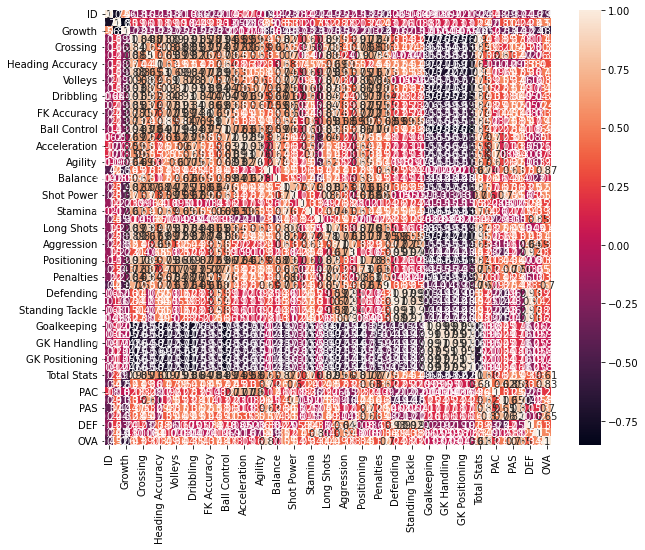

In [288]:
#Checking the heatmap
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(data_num.corr(), annot=True)
plt.show()

In [254]:
#Separation of features and target
y = data_num['ova']
X = data_num.drop(['ova'], axis=1)
X_num = X.select_dtypes(include = nm.number)
X_cat = data_cat

In [258]:
#Normalization using Minmax scaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(11660, 41)


In [ ]:
#Describing the normalized data
x_normalized.describe().T

In [302]:
y.head()

0    64
1    77
2    80
3    59
4    65
Name: ova, dtype: int64

In [314]:
#Test Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [310]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8162, 41)
(3498, 41)
(8162,)
(3498,)


In [311]:
#linear regression model
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model training
y_pred_linreg=linreg.predict(X_test)   # model prediction

In [316]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.8926438031998196

In [315]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9011499716280535

In [317]:
y_train[1:5]

3745    65
6984    69
7419    64
1694    61
Name: ova, dtype: int64

In [291]:
predictions[:5]

array([68.69432978, 55.90150029, 69.04638885, 53.85777909, 69.24535112])

In [296]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error as mse


train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 4.981191474233851 -- test MSE: 4.858850416770373


In [298]:
#Root Mean Squared Error
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 2.2318583006619956 -- test RMSE: 2.204280022313493


In [299]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 4.981191474233851 -- test MAE: 4.858850416770373


# FIFA 21 PROJECT (II)

In [325]:
#Creating a new function to clean all the datas
def clean_data(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    # I find this OVA calculator: https://sofifa.com/calculator?r=210056&set=true. So columns that I maintain are "Name" and "BP" to use them as a filter. Moreover, I keep the columns that shows the link. 
    df =df.drop(['Club','Joined','Loan Date End','A/W','D/W','ID','Age','Position','Nationality','Team & Contract','Height','Weight','foot','Growth','Value','Wage','Release Clause','Contract','Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping','Total Stats','Base Stats', "W/F", 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',"SM","BP","Name"], axis=1)
    # Drop some NaN values
    df = df[df['Volleys'].isna()==False]
    # In this case I decided to complete them with the mean. 
    mean_composure = df["Composure"].mean()
    df["Composure"] =df["Composure"].fillna(mean_composure)
    df['IR']=df['IR'].str.replace('★','') #This for replace the star with nothing
    df['IR'] = pd.to_numeric(df['IR'],errors='coerce') # It was string so I convert to numerical
    # Separate categorical and numerical columns
    numerical = df.select_dtypes(include = nm.number)
    categorical = df.select_dtypes(include = object)
    return df

# FIFA 21 PROJECT (III)

In [326]:
#Importing the data
data_valid=pd.read_csv('fifa21_validate.csv')

In [327]:
#Performing cleaning of columns using function
data_clean=clean_data(data_valid)

In [328]:
data_clean.head()

,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,IR,PAC,SHO,PAS,DRI,DEF,PHY,OVA
0,47,21,62,60,40.0,44,43.0,36,51,54,60,68,63.0,63,49.0,48,77.0,51,87,25,68,62.0,38.0,39.0,39,49.0,68,67,65.0,11,8,15,13,9,1,64,30,50,50,66,74,67
1,62,60,44,62,70.0,76,68.0,56,60,70,77,72,83.0,64,79.0,76,62.0,63,47,75,72,26.0,64.0,64.0,60,65.0,19,23,19.0,14,13,9,9,8,1,74,67,62,74,24,57,68
2,7,5,11,21,4.0,6,8.0,8,20,10,28,25,33.0,41,38.0,40,49.0,22,54,6,20,9.0,7.0,26.0,14,31.0,8,9,10.0,56,52,53,53,55,1,56,52,53,55,26,53,54
3,38,31,55,59,32.0,51,34.0,38,47,54,59,58,56.0,48,54.0,48,48.0,60,58,28,61,55.0,33.0,40.0,41,59.0,53,52,54.0,7,5,13,5,6,1,58,34,47,52,53,59,55
4,57,59,45,78,56.0,71,57.0,51,74,74,68,66,66.0,64,56.0,73,56.0,74,72,62,66,78.0,53.0,62.0,55,63.0,72,68,71.0,12,7,13,15,13,1,67,62,68,70,69,71,70


In [331]:
#Separation of features and target
y = data_clean['OVA']
X = data_clean.drop(['OVA'], axis=1)
X_num = X.select_dtypes(include = nm.number)
#Normalisation
x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

In [332]:
# Validation R2 scores
predictions = lm.predict(X_train)
r2_score_train = r2_score(y_train, predictions)
predictions_test = lm.predict(X_test)
r2_score_test = r2_score(y_test, predictions_test)
print ('train R2: {} -- test R2: {}'.format(r2_score_train,r2_score_test))


train R2: 0.8972048340624242 -- test R2: 0.8865867169371056


In [333]:
# Mean Squared Error
train_mse=mean_squared_error(y_train,predictions)
test_mse=mean_squared_error(y_test,predictions_test)
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 4.728566454547254 -- test MSE: 4.996376820022593


In [336]:
# Root Mean Squared Error
rmse_train = nm.sqrt(mean_squared_error(y_train,predictions))
rmse_test = nm.sqrt(mean_squared_error(y_test,predictions_test))
print ('train RMSE: {} -- test RMSE: {}'.format(rmse_train, rmse_test))

train RMSE: 2.1745267196673517 -- test RMSE: 2.235257663005004


In [337]:
# Mean Absolute Error
mae_train = mean_absolute_error(y_train, predictions)
mae_test = mean_absolute_error(y_test, predictions_test)
print ('train MAE: {} -- test MAE: {}'.format(mae_train,mae_test))

train MAE: 1.72395858087933 -- test MAE: 1.7631100022583723
